In [3]:
import os
import itertools
from itertools import groupby
from numpy import *
import operator
import numpy as np
import pandas as pd
import math
from statistics import mean
from pandas import *  
import glob
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
from bioinfokit.visuz import cluster
from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

In [4]:
path          = '/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/metadata' 
files         = os.listdir(path)
metadata      = [os.path.join(path,i) for i in files if i.endswith('metadata')]

In [5]:
def rename_cols(de,meta):
    de   = de.rename(columns=meta.set_index('barcode')['project_id'])
    cols = list(meta_frame_tumor['project_id'].drop_duplicates())
    de   = de[de.columns.intersection(cols)]
    return de

In [6]:
dfs = []
for filename in metadata:
    df = pd.read_csv(filename, sep='\t',header=0,skipinitialspace=True)
    dfs.append(df)
meta_frame  = pd.concat(dfs,ignore_index=True)
meta_frame['project_id'] =meta_frame['project_id'].apply(lambda x:x.split('-')[1])
meta_frame_tumor=meta_frame.query('sample_type == "Primary Tumor"')
meta_frame_normal=meta_frame.query('sample_type == "Solid Tissue Normal"')

In [8]:
meta_frame.to_csv('/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/metadata/metadata_TCGA', sep='\t',index=False)

In [6]:
exp    = "/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/de/lncRNAs_acrossatleast9cancer"
de_lncRNAs_pancancer = pd.read_csv(exp, sep="\t", header=0,skipinitialspace=True)
de_lncRNAs_pancancer.rename(columns={'external_gene_name':'Gene','filename':'sample'},inplace=True)
de_lncRNAs_pancancer['sample'] = de_lncRNAs_pancancer['sample'].apply(lambda x:x.split('-')[1])

In [7]:
path         = '/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/de' 
files        = os.listdir(path)
results      = [os.path.join(path,i) for i in files if i.startswith('lncRNA_0.58_')]
len(results)

14

In [16]:
test     = de_lncRNAs_pancancer.head()
tes_list = list(test.Gene)

In [25]:
tes_list

['A1BG-AS1', 'A1BG-AS1', 'A1BG-AS1', 'A1BG-AS1', 'A1BG-AS1']

In [39]:
dfs   = []
for filename in results:
    df    = pd.read_csv(filename, sep='\t',header=0,skipinitialspace=True,index_col='gene_sym')
    df    = df.drop(['external_gene_name', 'chr','start','end','gene_id','logFC','adj_pval','AveExpr','P.Value'], axis=1)
    #df    = df.loc[~df.index.duplicated(keep='first')]
    dfs.append(df)
de_frame  = pd.concat(dfs,axis=1)
de_frame.fillna(0,inplace =True)
de_frame_new=de_frame[de_frame.astype('bool').mean(axis=1)>=0.25]

/home/alva/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (556) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/alva/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (427) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [38]:
de_frame.gene_sym
   

,gene_sym,gene_sym,gene_sym,gene_sym,gene_sym,gene_sym,gene_sym,gene_sym,gene_sym,gene_sym,gene_sym,gene_sym,gene_sym,gene_sym
0,LINC01587,AC016026.1,AC000061.1,AC062028.1,KIAA0087,C1orf147,LINC01587,LINC01587,AC000061.1,LINC00525,PART1,AC000061.1,LINC01587,AC016026.1
1,AC016026.1,IGF2-AS,C22orf24,LINC00467,PART1,MIR4435-2HG,AC062028.1,AC016026.1,DLEU2L,MIR31HG,ZFHX2-AS1,IGF2-AS,AC016026.1,MIR503HG
2,RRN3P2,C22orf24,PART1,C1orf147,ZFHX2-AS1,C15orf54,LINC00525,IGF2-AS,DKFZP434K028,MIR4435-2HG,LINC01116,DKFZP434K028,RRN3P2,LINC01857
3,C22orf24,AL139352.1,TMEM51-AS1,LINC01116,AL512625.1,DLEU1,LINC00467,LINC00470,C7orf69,AC020659.1,IGF2BP2-AS1,FAM182A,DLEU2L,LINC01645
4,AL139352.1,LINC00525,AC021054.1,MIR4435-2HG,RPP38-DT,TYMSOS,C1orf147,LINC00525,AC062028.1,TMEM51-AS1,MIR4435-2HG,H19,KIAA0087,AC079793.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PACRG-AS1,NaN,NaN,NaN,NaN,NaN,NaN
3857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C2-AS1,NaN,NaN,NaN,NaN,NaN,NaN
3858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LINC01394,NaN,NaN,NaN,NaN,NaN,NaN
3859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AL645929.2,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
de_frame

,gene_id,external_gene_name,logFC,AveExpr,P.Value,adj_pval,TCGA-A4-8310-01A-11R-2404-07,TCGA-2Z-A9JT-01A-11R-A42S-07,TCGA-5P-A9K2-01A-11R-A42S-07,TCGA-A4-7734-01A-11R-A32Z-07,...,TCGA-IB-7897-01A-21R-2204-07,TCGA-S4-A8RM-01A-11R-A37L-07,TCGA-HZ-7289-01A-11R-2156-07,TCGA-HZ-7918-01A-11R-2156-07,TCGA-HZ-8638-01A-11R-2404-07,TCGA-3A-A9I5-01A-11R-A38C-07,TCGA-HZ-8519-01A-11R-2404-07,chr,start,end
gene_sym,,,,,,,,,,,,,,,,,,,,,
A1BG-AS1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
de_frame_new_tum = rename_cols(de_frame_new,meta_frame_tumor)
#de_frame_new_tum.to_csv('/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/de/de_tumor_df_for_tsne', sep='\t',index=True)

In [30]:
PCs    = "/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/de/de_tumor_df_for_PCs"
PC_de  = pd.read_csv(PCs, sep="\t", header=0,skipinitialspace=True)
PC_de.reset_index(inplace=True)
PC_de["group"] =PC_de['index'].apply(lambda x:x.split('.')[0])
PC_de.drop(['index'],axis =1,inplace=True)

In [10]:
def read_pca(Pcs):
    PC_de  = pd.read_csv(Pcs, sep="\t", header=0,skipinitialspace=True)
    PC_de.reset_index(inplace=True)
    PC_de["group"] =PC_de['index'].apply(lambda x:x.split('.')[0])
    PC_de.drop(['index'],axis =1,inplace=True)
    return PC_de

In [11]:
Pcs   = "/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/de/de_tumor_df_for_PCs"
PC_de = read_pca(Pcs)

In [12]:
Pcs        = "/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/de/de_normal_df_for_PCs"
PC_norm_de = read_pca(Pcs)

In [35]:
colors = {'KIRP':'darkblue', 'HNSC':'#22d8c3',
            'KICH':'grey','BRCA':'deeppink','PRAD':'red',
            'PRAD':'hotpink','ESCA':'purple','LUAD':'greenyellow',
            'LUSC':'skyblue','STAD':'teal','THCA':'indianred',
            'LIHC':'aquamarine','COAD':'green','KIRC':'plum',
            'PAAD':'orange'}
def plot3d(PC_de,colors,title):
    groups = PC_de.groupby('group')
    ax     = fig.add_subplot(111, projection='3d')
    ax.w_xaxis.set_pane_color((0.1,0.1,0.1,0.1))
    ax.w_yaxis.set_pane_color((0.1,0.1,0.1,0.1))
    ax.w_zaxis.set_pane_color((0.1,0.1,0.1,0.1))
    for name, group in groups:
        ax.scatter(group.PC1, group.PC2, group.PC3,label=name,color=colors[name])
        ax.legend()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')   
    ax.title.set_text(title)

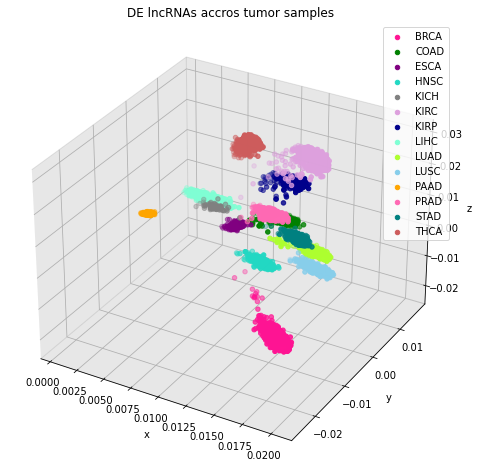

In [209]:
plot3d(PC_de,colors,"DE lncRNAs accros tumor samples")
fig.savefig('pca_de_lncRNAs_tumor.svg')

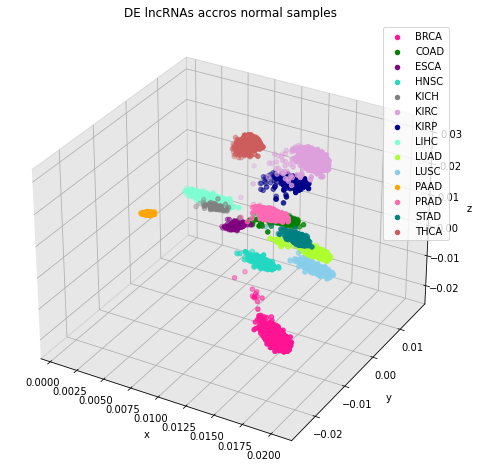

In [36]:
fig    = plt.figure(figsize=(8,10))
plot3d(PC_norm_de,colors,"DE lncRNAs accros normal samples")
fig.savefig('pca_de_lncRNAs_normal.svg')

In [38]:
de_frame_new_norm = rename_cols(de_frame_new,meta_frame_normal)
de_frame_new_norm.rename('norm_{}'.format, axis=1,inplace=True)

In [45]:
de_frame_new_norm.reset_index(inplace=True)
de_frame_new_tum.reset_index(inplace=True)

In [47]:
de_frame_tum_norm =pd.merge(de_frame_new_norm,de_frame_new_tum,on='gene_sym')

In [50]:
de_frame_tum_norm.to_csv('/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/de/de_frame_tum_norm', sep='\t',index=True)

In [216]:
de_frame_new_tum.to_csv('/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/de/de_normal_df_for_tsne', sep='\t',index=True)

In [27]:
de_frame_new[['TCGA-BH-A1FH-11B-42R-A13Q-07','TCGA-A2-A0EN-01A-13R-A084-07']]

,TCGA-BH-A1FH-11B-42R-A13Q-07,TCGA-A2-A0EN-01A-13R-A084-07
gene_sym,,
LINC01587,0.000000,0.000000
AC016026.1,-2.022506,-2.220340
RRN3P2,0.000000,0.000000
ZFHX2-AS1,0.000000,0.000000
C1orf147,-2.714384,-1.792918
...,...,...
LINC01215,0.000000,0.000000
AC005550.2,0.000000,0.000000
LINC02421,0.000000,0.000000
